### **Data Science**
*by Bruno Guarda*   
[<img alt="Colaboratory logo" width="10%" src="https://img.shields.io/badge/LinkedIn-0077B5?style=for-the-badge&logo=linkedin&logoColor=white">](https://linkedin.com/in/bruno-guarda)
[<img alt="Colaboratory logo" width="10%" src="https://img.shields.io/badge/Medium-12100E?style=for-the-badge&logo=medium&logoColor=white">](https://medium.com/@bsguarda)
[<img alt="Colaboratory logo" width="10%" src="https://img.shields.io/badge/GitHub-100000?style=for-the-badge&logo=github&logoColor=white">](
https://github.com/bsguarda)

___

# Turnover

<center><img alt="Colaboratory logo" width="70%" src="https://raw.githubusercontent.com/bsguarda/Projeto_turnover/718aa09f67b6f610d76ecf4c8d5afaa1ec931bf7/turnover.jpg"></center>

Turnover é o termo em inglês para “rotatividade”. Em resumo, trata-se da relação entre o número de contratações e desligamentos, em comparação com o número total de colaboradores. Contudo, o número elevado pode ser interpretado de diferentes maneiras e uma análise aprofundada mostra que o entra-e-sai de profissionais pode ter consequências bem complexas para o negócio. Isso, porque ela envolve gastos com novos processos de recrutamento, seleção e treinamento.

Há, também, casos em que os colaboradores levam consigo alguns dos clientes, deixando a companhia em desvantagem. Por essa razão, é preciso saber como reduzir essa taxa e garantir melhores resultados no futuro.

Desse modo, custos extras podem ser eliminados, profissionais talentosos podem ser retidos, e a empresa, nos diversos níveis e áreas, beneficiada.



In [1]:
#importando as bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

O dataset utilizado foi retirado do site [Kaggle]('https://kaggle.com/'), e ajudará a retirar insights importantes e treinar um modelo de Machine Learning para prever a rotatividade de funcionários.

In [2]:
#lendo os dataset e transformando em data frame
dataset = pd.read_csv('https://raw.githubusercontent.com/bsguarda/Projeto_turnover/main/turnover.csv', encoding = "ISO-8859-1")
dataset.head()

,stag,event,gender,age,industry,profession,traffic,coach,head_gender,greywage,way,extraversion,independ,selfcontrol,anxiety,novator
0,7.030801,1,m,35.0,Banks,HR,rabrecNErab,no,f,white,bus,6.2,4.1,5.7,7.1,8.3
1,22.965092,1,m,33.0,Banks,HR,empjs,no,m,white,bus,6.2,4.1,5.7,7.1,8.3
2,15.934292,1,f,35.0,PowerGeneration,HR,rabrecNErab,no,m,white,bus,6.2,6.2,2.6,4.8,8.3
3,15.934292,1,f,35.0,PowerGeneration,HR,rabrecNErab,no,m,white,bus,5.4,7.6,4.9,2.5,6.7
4,8.410678,1,m,32.0,Retail,Commercial,youjs,yes,f,white,bus,3.0,4.1,8.0,7.1,3.7


#### Verificando os dados do Dataset

In [3]:
total_turnover = (dataset.event == 1).sum()
total_registros = dataset.shape[0]
print(f'O total de registros é: {total_registros}')
print(f'Desses registros, {total_turnover} são de turnover')
print(f'O que equivale a {((total_turnover * 100) / total_registros):.4f}%')

O total de registros é: 1129
Desses registros, 571 são de turnover
O que equivale a 50.5757%


In [4]:
#analisando o dataset
print(f'O dataset tem: \n\n {dataset.shape[0]} linhas\n {dataset.shape[1]} colunas\n') #numero de linhas e colunas
print(f'As variáveis são:\n\n {dataset.columns.values}\n') #identificando as variáveis
print(f'Os dados ausentes são no total de : {dataset.isnull().sum().values.sum()} registros\n')
print(f'Os tipos das variáveis do dataset são: \n\n{dataset.dtypes}\n') #identificando os tipos dos dados

O dataset tem: 

 1129 linhas
 16 colunas

As variáveis são:

 ['stag' 'event' 'gender' 'age' 'industry' 'profession' 'traffic' 'coach'
 'head_gender' 'greywage' 'way' 'extraversion' 'independ' 'selfcontrol'
 'anxiety' 'novator']

Os dados ausentes são no total de : 0 registros

Os tipos das variáveis do dataset são: 

stag            float64
event             int64
gender           object
age             float64
industry         object
profession       object
traffic          object
coach            object
head_gender      object
greywage         object
way              object
extraversion    float64
independ        float64
selfcontrol     float64
anxiety         float64
novator         float64
dtype: object



In [5]:
#transformando o tipo da variável age em int
dataset['age'] = dataset['age'].astype(float).astype(int)

In [6]:
#verificando valores únicos nas colunas
print(f'Valores únicos por colunas: \n\n {dataset.nunique()}')

Valores únicos por colunas: 

 stag            773
event             2
gender            2
age              38
industry         16
profession       15
traffic           8
coach             3
head_gender       2
greywage          2
way               3
extraversion     13
independ         15
selfcontrol      13
anxiety          12
novator          14
dtype: int64


In [7]:
#utilizado a ferramenta describe para avaliar alguns parâmetros estatísticos do Dataset
dataset.describe()

,stag,event,age,extraversion,independ,selfcontrol,anxiety,novator
count,1129.000000,1129.000000,1129.000000,1129.000000,1129.000000,1129.000000,1129.000000,1129.000000
mean,36.627526,0.505757,31.063773,5.592383,5.478034,5.597254,5.665633,5.879628
std,34.096597,0.500188,6.996542,1.851637,1.703312,1.980101,1.709176,1.904016
min,0.394251,0.000000,18.000000,1.000000,1.000000,1.000000,1.700000,1.000000
25%,11.728953,0.000000,26.000000,4.600000,4.100000,4.100000,4.800000,4.400000
50%,24.344969,1.000000,30.000000,5.400000,5.500000,5.700000,5.600000,6.000000
75%,51.318275,1.000000,36.000000,7.000000,6.900000,7.200000,7.100000,7.500000
max,179.449692,1.000000,58.000000,10.000000,10.000000,10.000000,10.000000,10.000000


#### Iremos a avaliar, de acordo com o dataset, no intuito de trazer insights a cerca dos dados apresentados e responder as seguintes perguntas:

1 - Qual a porcentagem de pessoas que saem das empresas?

2 - Qual o gênero das pessoas que está mais presente no Turnover?

3 - Qual a faixa de idade de quem se apresenta no Turnover?

4 - Qual a industria que mais apresenta pessoas que mudam de empresa?

5 - Qual o gênero do gestor das pessoas que mais se apresentam no turnover?

6 - Qual a profissão onde há mais pessoas que se apresentam no turnover?

7 - Qual tipo de transporte usado pelas pessoas que se apresentam no turnover?

8 - Qual é a faixa de idade que de quem se apresenta no turnover relacionando-as gênero dos funcionários se relacionam com o gênero do gestor? 

### 1 - Qual a porcentagem de pessoas que saem das empresas?

In [8]:
#identificando a quantidade de pessoas que se apresentam no turnover
total_turnover = (dataset.event == 1).sum()
total_registros = dataset.shape[0]
print(f'O total de registros é: {total_registros}')
print(f'Desses registros, {total_turnover} são de turnover')
print(f'O que equivale a {((total_turnover * 100) / total_registros):.4f}%')

O total de registros é: 1129
Desses registros, 571 são de turnover
O que equivale a 50.5757%


### 2 - Qual o gênero das pessoas que está mais presente no Turnover?

Primeiramente iremos avaliar a disposição dos registro dos gêneros plotando um gráfico de barras para termos um visualização. 

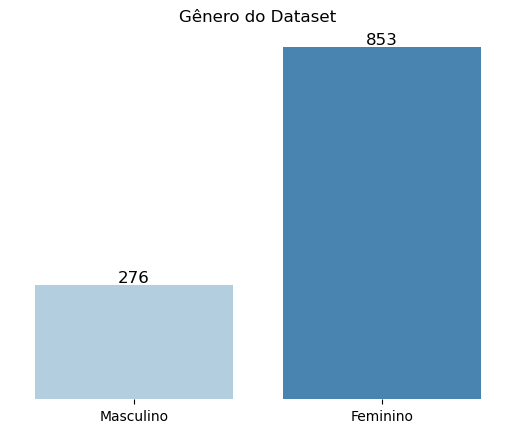

In [167]:
#filtrando e plotando o gráfico com os registros de gênero
dfgender = sns.countplot(dataset.gender, palette='Blues')
dfgender.set_xticklabels(['Masculino','Feminino'])
dfgender.get_yaxis().set_visible(False)
plt.title('Gênero do Dataset')
for x in ['top', 'bottom', 'right', 'left']:
  dfgender.spines[x].set_visible(False)
for i in dfgender.patches:
  dfgender.annotate(i.get_height(),
              (i.get_x() + i.get_width() / 2, i.get_height()),
              ha='center', va='bottom', fontsize=12, color='black')  
dfgender.set_xlabel('')
plt.show()              


In [10]:
#avaliando a variável gênero 
genero_total = dataset.gender.count()
genero_feminino = dataset.groupby(['gender']).size()[0]
genero_masculino = dataset.groupby(['gender']).size()[1]

print('Total de registros: {}'.format(genero_total))
print('Total de pessoas do gênero feminino: {}'.format(genero_feminino))
print('Total de pessoas do gênero masculino: {}'.format(genero_masculino))
print('A quantidade de gênero feminino equivale a:{:10.2f}%'.format((genero_feminino * 100) / genero_total))
print('A quantidade de gênero masculino equivale a:{:10.2f}%'.format((genero_masculino * 100) / genero_total))


Total de registros: 1129
Total de pessoas do gênero feminino: 853
Total de pessoas do gênero masculino: 276
A quantidade de gênero feminino equivale a:     75.55%
A quantidade de gênero masculino equivale a:     24.45%


Podemos notar que mais de 75% dos registros do dataset é do gênero feminino e esse número deverá refletir no quantidade de pessoas que se apresentam no turnover como veremos mais adiante.

#### Vamos verificar qual gênero mais se apresenta no turnover

In [11]:
#verificando qual gênero está mais presente no turnover

turnover_total = dataset.groupby(['event','gender']).size()[1].sum()
turnover_feminino = dataset.groupby(['event','gender']).size()[1][0]
turnover_masculino = dataset.groupby(['event','gender']).size()[1][1]

print('A quantidade de pessoas presentes no turnover do gênero feminino é : {}'.format(turnover_feminino))
print('A quantidade de pessoas presentes no turnover do gênero masculino é : {}'.format(turnover_masculino))
print('A quantidade de pessoas presentes no turnover do gênero feminino equivale a:{:10.2f}%'
    .format((turnover_feminino * 100) / turnover_total))
print('A quantidade de pessoas presentes no turnover do gênero masculino equivale a:{:10.2f}%'
    .format((turnover_masculino * 100) / turnover_total))


A quantidade de pessoas presentes no turnover do gênero feminino é : 436
A quantidade de pessoas presentes no turnover do gênero masculino é : 135
A quantidade de pessoas presentes no turnover do gênero feminino equivale a:     76.36%
A quantidade de pessoas presentes no turnover do gênero masculino equivale a:     23.64%


Podemos ver que dos 571 registros que são classificados como turnover, 436 desses são do gênero feminino, esse número corresponde a mais de 76% do valor total de registros classificados com turnover.

### 3 - Qual a faixa de idade de quem se apresenta no Turnover?

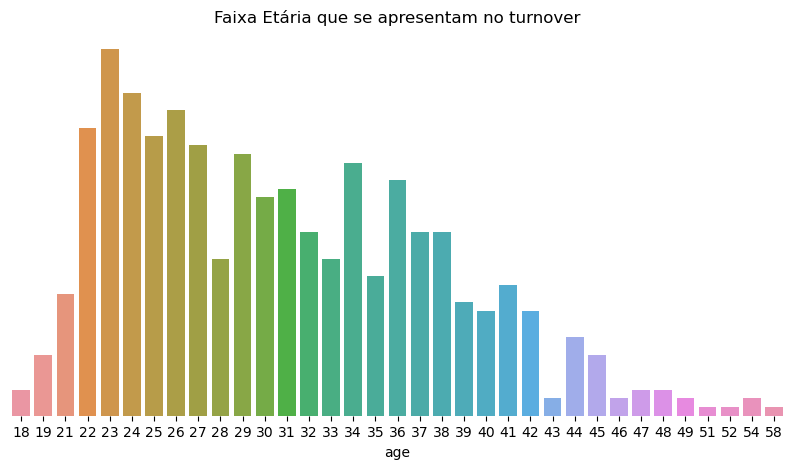

In [12]:
#filtrando a faixa de idade que se apresenta no turnover
age_turnover = dataset[['event','age']][dataset['event']==1]

#plotando o gráfico com a faixa etária que se apresentam no turnover
plt.figure(figsize=(10,5))
plot_age =  sns.countplot(age_turnover.age)
for x in ['top', 'bottom', 'right', 'left']:
  plot_age.spines[x].set_visible(False)
plot_age.get_yaxis().set_visible(False)  
plt.title('Faixa Etária que se apresentam no turnover');


Podemos perceber que a faixa entre 22 anos a 34 anos é que mais apresenta registros de turnover e faixa de a partir de 46 anos com bem poucos registros.

### 4 - Qual a industria (setor) que mais apresenta pessoas que mudam de empresa?


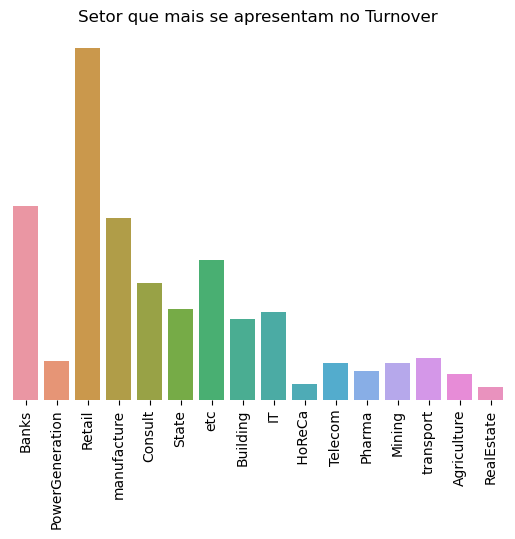

In [13]:
#filtrando o setor que mais se apresentam no turnover
industry_turnover = dataset[['event','industry']][dataset['event']==1]

#plotando o gráfico da variável industry
plot_industry = sns.countplot(industry_turnover.industry)
plt.xticks(rotation=90)
plt.title('Setor que mais se apresentam no Turnover')
plot_industry.get_yaxis().set_visible(False)
for x in ['top', 'bottom', 'right', 'left']:
  plot_industry.spines[x].set_visible(False)
plot_industry.set_xlabel('');

O gráfico nos mostra que o turnover acontece mais no setor `Retail`, ou seja, no setor de Varejo, seguido do setor bancário e depois o setor de manufatura.

### 5 - Qual o gênero do gestor das pessoas que mais se apresentam no turnover?

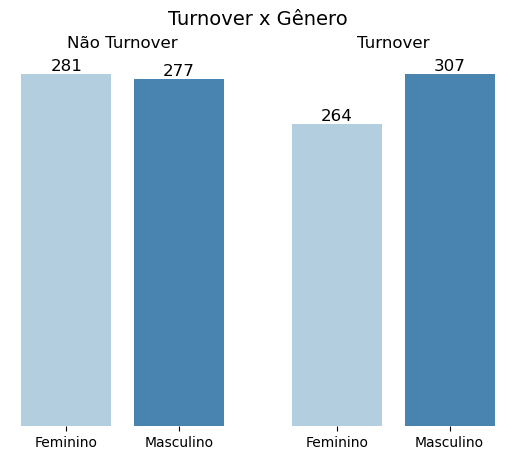

In [14]:
#filtrando a variável head_gender que se apresentam no turnover
head_turnover = dataset[['event', 'head_gender']][dataset['event'] == 1]

#plotando o gráfico dos gestores que se apresentam no turnover e que não se apresentam
df1 = dataset[['event','head_gender']][dataset['event'] == 0]
df2 = dataset[['event','head_gender']][dataset['event'] == 1] 

fig, ax = plt.subplots(1,2)
plt.text(-1.5, 350, 'Turnover x Gênero', size=(14))
plot1 = sns.countplot(df1.head_gender, ax=ax[0], palette='Blues')
plot2 = sns.countplot(df2.head_gender, ax=ax[1], palette='Blues')
plt.title('Turnover x Gênero')
ax[0].set_title('Não Turnover')
ax[1].set_title('Turnover')
ax[0].set_xlabel('')
ax[1].set_xlabel('')
ax[0].set_xticklabels(['Feminino','Masculino'])
ax[1].set_xticklabels(['Feminino','Masculino'])
for x in ['top', 'bottom', 'right', 'left']:
  ax[0].spines[x].set_visible(False)
  ax[1].spines[x].set_visible(False)
ax[0].get_yaxis().set_visible(False)
ax[1].get_yaxis().set_visible(False)
for i in plot1.patches:
  plot1.annotate(i.get_height(),
              (i.get_x() + i.get_width() / 2, i.get_height()),
              ha='center', va='bottom', fontsize=12, color='black')
for i in plot2.patches:
  plot2.annotate(i.get_height(),
              (i.get_x() + i.get_width() / 2, i.get_height()),
              ha='center', va='bottom', fontsize=12, color='black')              
fig.show()

O gráfico mostra que o gênero dos gestores onde não se apresenta o turnover o gênero que mais se apresenta é o feminino porém com uma diferença muito pequena e já quando se apresenta o turnover vemos que gênero em maior número é o masculino.

### 6 - Qual a profissão onde há mais pessoas que se apresentam no turnover?


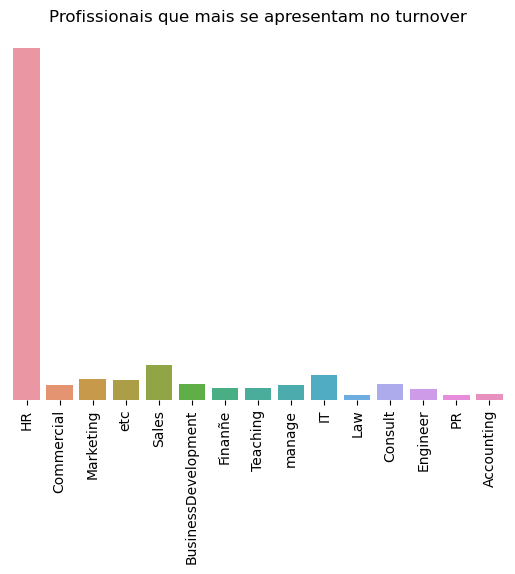

In [15]:
#filtrando a variável profession que se apresentam no turnover
profession_turnover = dataset[['event','profession']][dataset['event'] == 1]

#plotando gráfico dos profissionais que mais se apresentam no turnover
plot_profession = sns.countplot(x='profession', data=profession_turnover)
plt.title('Profissionais que mais se apresentam no turnover')
plt.xticks(rotation=90)
plot_profession.get_yaxis().set_visible(False)
for x in ['top', 'bottom', 'right', 'left']:
  plot_profession.spines[x].set_visible(False)
plot_profession.set_xlabel('');

Podemos verificar que os profissionais de RH são, disparadamente, os que mais se apresentam no turnover. 

### 7 - Qual tipo de transporte usado pelas pessoas que se apresentam no turnover?

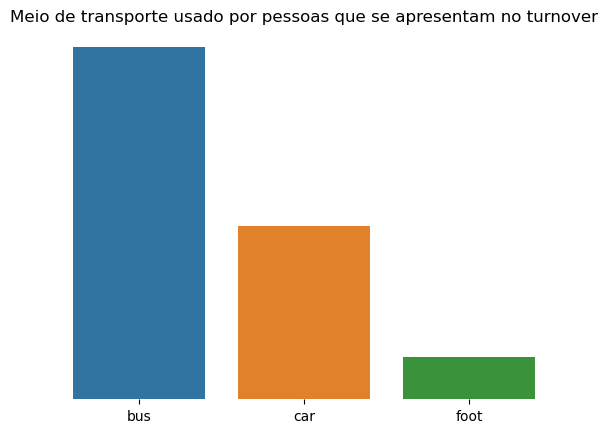

In [16]:
#filtrando qual tipo de transporte usam as pessoas que se apresentam no turnover 
way_turnover = dataset[['event','way']][dataset['event']==1]

#plotando o gráfico dos meios de transportes mais usados por quem se apresenta no turnover
plot_way = sns.countplot(way_turnover.way)
plt.title('Meio de transporte usado por pessoas que se apresentam no turnover')
plot_way.set_xlabel("")
for x in ['top', 'bottom', 'right', 'left']:
  plot_way.spines[x].set_visible(False)
plot_way.get_yaxis().set_visible(False)  

Mais da metade das pessoas que se apresentam no turnover usam o ônibus como meio de transporte, 

### 8 - Qual é a faixa de idade que de quem se apresenta no turnover relacionando-as gênero dos funcionários se relacionam com o gênero do gestor? 

##### Vamos verificar no gráfico a faixa de idade dos registros relacionando-os com as variáveis gênero do funcionário e o gênero do gestor que se apresenta  no turnover;

Como vimos que o gênero de funcionário que mais se apresenta é o feminino vamos começar por ele.

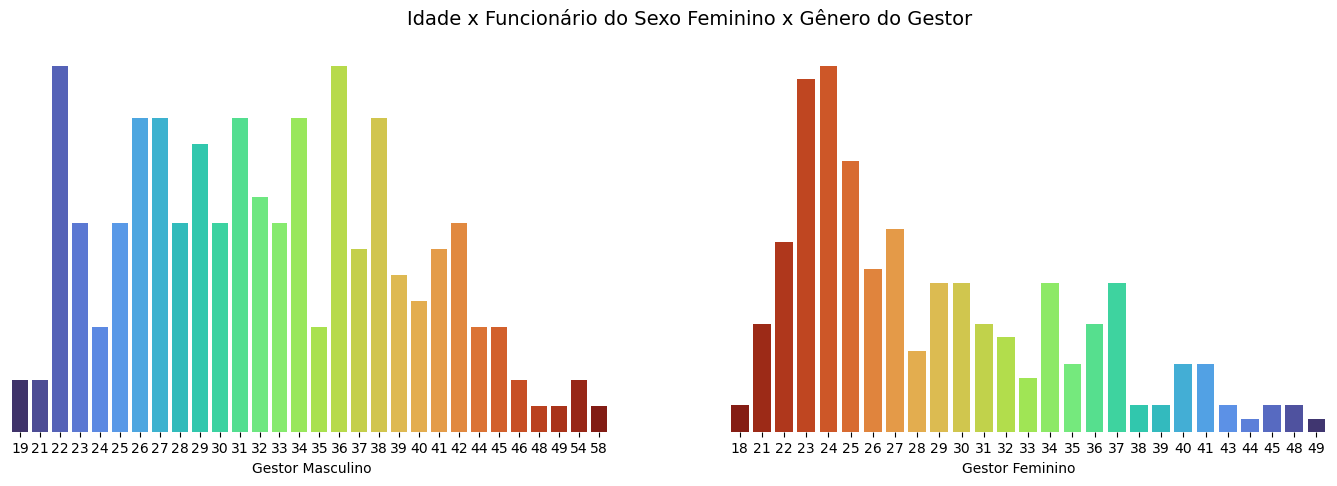

In [164]:
#Verificando as idade filtrando com gênero do funcionário feminino e gênero do gestor masculino
corr1 = dataset[['event','age','gender', 'head_gender']][(dataset['gender'] == 'f') & (dataset['head_gender'] == 'm') & (dataset['event'] == 1)]

#Verificando as idade filtrando com gênero do funcionário feminino e gênero do gestor feminino
corr2 = dataset[['event','age','gender', 'head_gender']][(dataset['gender'] == 'f') & (dataset['head_gender'] == 'f') & (dataset['event'] == 1)]

#mudando o nome das colunas age 
corr1.rename(columns={'age': 'age_m'}, inplace=True)
corr2.rename(columns={'age': 'age_f'}, inplace=True)

#plotando o gráfico
fig, ax = plt.subplots(1,2, figsize=(17,5))
plt.text(-15, 30, 'Idade x Funcionário do Sexo Feminino x Gênero do Gestor', size=(14))
plt.text(-22, -3, 'Gestor Masculino', size=(10))
plt.text(10, -3, 'Gestor Feminino', size=(10))
corr1_plot = sns.countplot(corr1.age_m, ax=ax[0], palette='turbo')
corr2_plot = sns.countplot(corr2.age_f, ax=ax[1], palette='turbo_r')
for x in ['top', 'bottom', 'right', 'left']:
  ax[0].spines[x].set_visible(False)
  ax[1].spines[x].set_visible(False)
ax[0].get_yaxis().set_visible(False)
ax[1].get_yaxis().set_visible(False)
ax[0].set_xlabel('')
ax[1].set_xlabel('')
plt.show()



Verificamos que na relação de funcionário feminino e o gestor masculino as idades que mais se aparecem é 22 e 36 anos, enquanto que na relação de funcionário feminino e gestor feminino as idades que mais aparecem é 23 e 24. 

Podemos verificar também que a faixa de idade para os gestores masculino, 22 a 38 anos, se apresentam em uma faixa bem maior do que a faixa para gestor feminino, 23 a 27 anos.

Agora iremos verificar o gênero de funcionário masculino com relação aos gêneros dos gestores

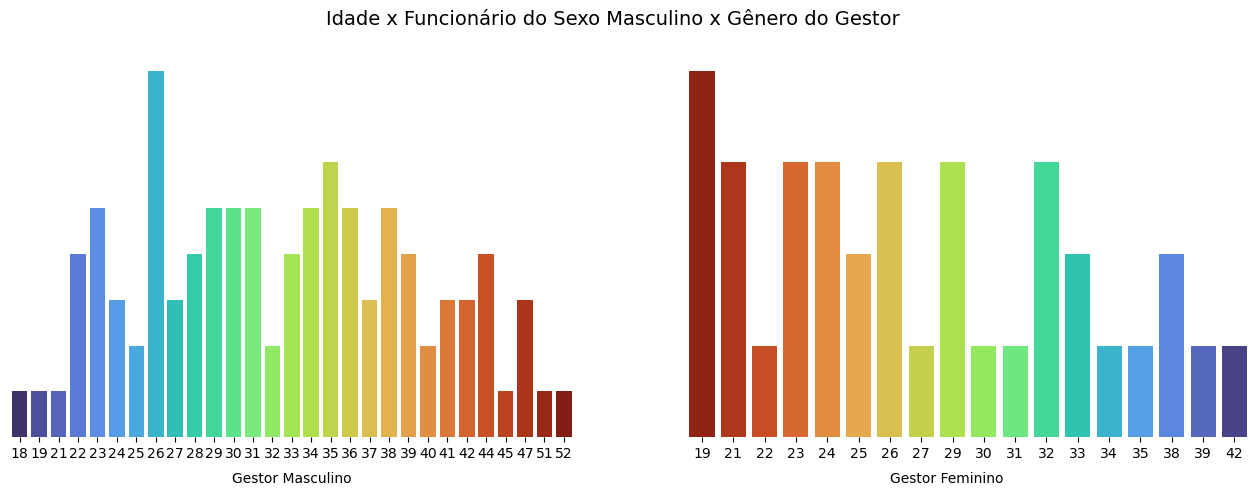

In [165]:
#Verificando as idade filtrando com gênero do funcionário masculino e gênero do gestor masculino
corr3 = dataset[['event','age','gender', 'head_gender']][(dataset['gender'] == 'm') & (dataset['head_gender'] == 'm') & (dataset['event'] == 1)]

#Verificando as idade filtrando com gênero do funcionário masculino e gênero do gestor feminino
corr4 = dataset[['event','age','gender', 'head_gender']][(dataset['gender'] == 'm') & (dataset['head_gender'] == 'f') & (dataset['event'] == 1)]

#mudando o nome das colunas age 
corr3.rename(columns={'age': 'age_m'}, inplace=True)
corr4.rename(columns={'age': 'age_f'}, inplace=True)

#plotando o gráfico
fig, ax = plt.subplots(1,2, figsize=(16,5))
plt.text(-12, 4.5, 'Idade x Funcionário do Sexo Masculino x Gênero do Gestor', size=(14))
plt.text(-15, -0.5, 'Gestor Masculino', size=(10))
plt.text(6, -0.5, 'Gestor Feminino', size=(10))
corr3_plot = sns.countplot(corr3.age_m, ax=ax[0], palette='turbo')
corr4_plot = sns.countplot(corr4.age_f, ax=ax[1], palette='turbo_r')
for x in ['top', 'bottom', 'right', 'left']:
  ax[0].spines[x].set_visible(False)
  ax[1].spines[x].set_visible(False)
ax[0].get_yaxis().set_visible(False)
ax[1].get_yaxis().set_visible(False)
ax[0].set_xlabel('')
ax[1].set_xlabel('')
plt.show()

Verificamos que na relação de funcionário masculino e o gestor masculino as idades que mais se aparecem é 26 e 35 anos, enquanto que na relação de funcionário masculino e gestor feminino a idade que mais aparecem é 19. 

Vale ressaltar que a quantidades de registros para o gestor feminino é bem menor do que a gestor masculino.

## Modelo de Machine Learning prever o Turnover

##### Será utilizado o algorítimo de Regressão Logística, que é uma técnica de análise de dados que usa matemática para encontrar as relações entre dois fatores de dados. Em seguida, essa relação é usada para prever o valor de um desses fatores com base no outro. A previsão geralmente tem um número finito de resultados, como sim ou não.

In [213]:
#importando as bibliotecas necessárias
!pip install scikit-plot
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
import scikitplot as skplt
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score, classification_report, log_loss


In [174]:
#criando um copia do dataset original para futura modificação
df_turnover = dataset

Vamos verificar as variáveis do dataset

In [175]:
#verificando as variáveis do dataset
df_turnover.columns.values

array(['stag', 'event', 'gender', 'age', 'industry', 'profession',
       'traffic', 'coach', 'head_gender', 'greywage', 'way',
       'extraversion', 'independ', 'selfcontrol', 'anxiety', 'novator'],
      dtype=object)

In [173]:
#verificando as primeiras linhas do dataset
dataset.head()

,stag,event,gender,age,industry,profession,traffic,coach,head_gender,greywage,way,extraversion,independ,selfcontrol,anxiety,novator
0,7.030801,1,m,35,Banks,HR,rabrecNErab,no,f,white,bus,6.2,4.1,5.7,7.1,8.3
1,22.965092,1,m,33,Banks,HR,empjs,no,m,white,bus,6.2,4.1,5.7,7.1,8.3
2,15.934292,1,f,35,PowerGeneration,HR,rabrecNErab,no,m,white,bus,6.2,6.2,2.6,4.8,8.3
3,15.934292,1,f,35,PowerGeneration,HR,rabrecNErab,no,m,white,bus,5.4,7.6,4.9,2.5,6.7
4,8.410678,1,m,32,Retail,Commercial,youjs,yes,f,white,bus,3.0,4.1,8.0,7.1,3.7


A variável alvo será `event` que considera 0 para registros não classificados como Turnover e 1 para registros classificados como turnover.

Vamos verificar o balanceamento dessa variável.

<AxesSubplot:xlabel='event', ylabel='count'>

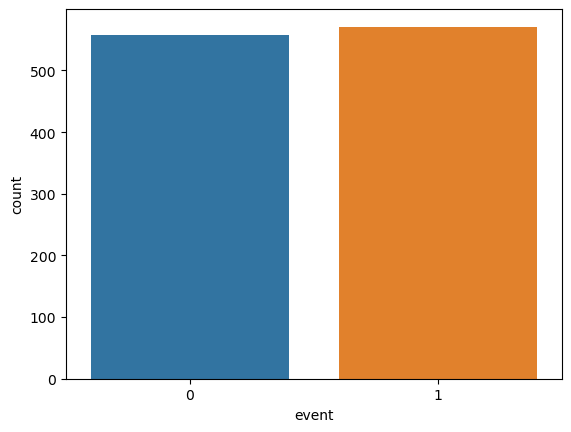

In [169]:
#plotando a variável event
sns.countplot(dataset.event)

Como podemos observar a variável alvo está balanceada e não será necessário aplicar nenhum método de balanceamento.

##### Pré Processamento dos dados

Iremos transformar as variáveis categóricas em dummies que são variáveis binárias (0 ou 1) criadas para representar uma variável com duas ou mais categorias.

In [176]:
#convertendo as variáveis categóricas em dummies
df_turnover = pd.get_dummies(df_turnover)

In [178]:
#checando o dataset
df_turnover.head()

,stag,event,age,extraversion,independ,selfcontrol,anxiety,novator,gender_f,gender_m,...,coach_my head,coach_no,coach_yes,head_gender_f,head_gender_m,greywage_grey,greywage_white,way_bus,way_car,way_foot
0,7.030801,1,35,6.2,4.1,5.7,7.1,8.3,0,1,...,0,1,0,1,0,0,1,1,0,0
1,22.965092,1,33,6.2,4.1,5.7,7.1,8.3,0,1,...,0,1,0,0,1,0,1,1,0,0
2,15.934292,1,35,6.2,6.2,2.6,4.8,8.3,1,0,...,0,1,0,0,1,0,1,1,0,0
3,15.934292,1,35,5.4,7.6,4.9,2.5,6.7,1,0,...,0,1,0,0,1,0,1,1,0,0
4,8.410678,1,32,3.0,4.1,8.0,7.1,3.7,0,1,...,0,0,1,1,0,0,1,1,0,0


##### Separando o dataset

Para que possamos fazer as previsões primeiro precisamos separar os dados em dados de treino e de teste

In [182]:
#separando o dataset
X = df_turnover.drop('event', axis=1)
y = df_turnover['event']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, shuffle=True)

In [180]:
#verificando os dados de treino
X_train.head()

,stag,age,extraversion,independ,selfcontrol,anxiety,novator,gender_f,gender_m,industry_ HoReCa,...,coach_my head,coach_no,coach_yes,head_gender_f,head_gender_m,greywage_grey,greywage_white,way_bus,way_car,way_foot
94,9.626283,25,5.4,6.9,5.7,3.3,2.9,1,0,0,...,1,0,0,1,0,0,1,1,0,0
784,7.819302,30,5.4,3.4,3.3,8.7,8.3,1,0,0,...,0,1,0,0,1,0,1,0,1,0
268,2.759754,41,3.8,8.4,2.6,4.8,7.5,1,0,0,...,0,1,0,0,1,0,1,1,0,0
716,13.930185,27,7.0,4.8,6.4,4.8,4.4,1,0,0,...,0,1,0,1,0,0,1,1,0,0
671,55.950719,40,4.6,9.1,4.9,3.3,2.9,1,0,0,...,0,1,0,1,0,0,1,0,0,1


In [189]:
#Treinando com Regressão Logística
clf = LogisticRegression(C=100).fit(X_train, y_train)

#verificando a Acurácia do modelo
print(f'A Acurácia da Regressão Logística foi de {clf.score(X_train, y_train):.2f}')
print(f'A Acurácia da Regressão Logística foi de {clf.score(X_test, y_test):.2f}')

A Acurácia da Regressão Logística foi de 0.65
A Acurácia da Regressão Logística foi de 0.59


Será feita a previsão do modelo e visualizar o relatório do modelo trazendo a principais métricas apresentadas pelo modelo mostrando a matriz de confusão, acurácia e AUC.

Relatorio de classificação: 
               precision    recall  f1-score   support

           0       0.59      0.61      0.60       140
           1       0.60      0.57      0.59       143

    accuracy                           0.59       283
   macro avg       0.59      0.59      0.59       283
weighted avg       0.59      0.59      0.59       283

Acurácia: 0.59
AUC: 0.59


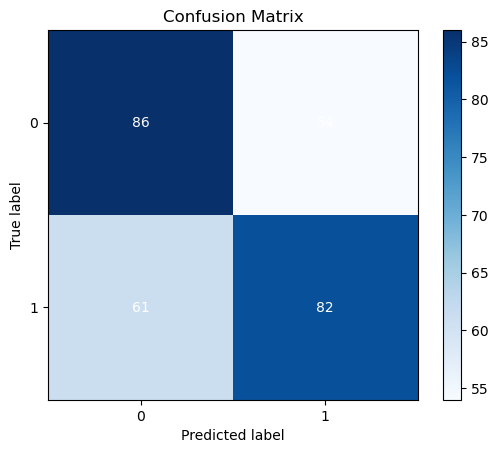

In [231]:
#fazendo previsões
y_pred = clf.predict(X_test)
y_proba = clf.predict_proba(X_test)

#Relatório do modelo

print('Relatório de classificação: \n', classification_report(y_test, y_pred))

#matriz de confusão
skplt.metrics.plot_confusion_matrix(y_test, y_pred);

#acurácia
print(f'Acurácia: {accuracy_score(y_test, y_pred):.2f}')

#AUC
print(f'AUC: {roc_auc_score(y_test, y_pred):.2f}')

### Conclusão

O modelo apresentado trouxe uma acurácia e a AUC de aproximadamente 59%, o que ainda poderia melhora-los utilizando o tunning dos parâmetros do algoritmo.

Na análise exploratória pudemos vê que a maioria dos gestores das pessoas que se enquadraram no Turnover é do sexo Masculino, e isso é visto na maioria das empresas no mundo. E alguns anos vem mudando com mulheres assumindo cargos de liderança e também como executivo. Algumas empresa tratam com mais importância essa vertente e ja possuem projetos voltados para isso como vagas exclusivas e afirmativas para mulheres trazendo o equilíbrio de gênero para a corporação.

Outro ponto observado que o setor que mais trouxe registros de turnover foi o do Varejo, muitos lojistas podem pensar, ainda, que a grande causa é apenas o salário é suficiente para o funcionário tomar a decisão de buscar um novo emprego, mas eles se esquecem de outros pontos importantes, como a falta de investimento em treinamento e capacitação, e a ausência de programas de benefícios e plano de carreira.

Uma pesquisa realizada pela consultoria Robert Half, no Brasil, mostrou que os principais motivos que levam os funcionários a quererem deixar seus empregos são remuneração baixa e falta de reconhecimento (33%), desmotivação (30%), preocupação com o futuro da companhia (29%) e baixo equilíbrio entre trabalho e vida pessoal (26%). E, além disso, um ponto que não está especificado na pesquisa é a insatisfação com a liderança direta. Ter bons líderes dentro de cada equipe faz toda a diferença. Uma liderança inspiradora acaba atraindo as pessoas, mas um péssimo líder fere, desmotiva e acaba afastando seus funcionários.

Por fim, podemos destacar algumas formas para redução do turnover:


* A revisão do processo de recrutamento e seleção e o contrato de trabalho é essencial;

* Manter plano de carreira e a política de cargos e salários é importante para reduzir o turnover voluntário;

* Programas de resolução de conflitos e humanização, principalmente entre líderes e colaboradores podem ajudar;

* Promover um ambiente de trabalho agradável e um bom clima organizacional, além de feedbacks frequentes com diálogo aberto entre líderes e equipes;

* É pertinente detalhar as entrevistas de desligamento para esclarecer efetivamente quais os pontos que ocasionam perdas de profissionais.
